In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

import h5utils as mutils # An util to create h5 type file using images
import logistic_regression_utils as lr #contains building blocks for logistic regression.

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

In [11]:
mutils.images_to_h5()

dataset/train/digit_0/*.png
dataset/train/digit_1/*.png
dataset/train/digit_2/*.png
dataset/train/digit_3/*.png
dataset/train/digit_4/*.png
dataset/train/digit_5/*.png
dataset/train/digit_6/*.png
dataset/train/digit_7/*.png
dataset/train/digit_8/*.png
dataset/train/digit_9/*.png
dataset/train/character_1_ka/*.png
dataset/train/character_2_kha/*.png
dataset/train/character_3_ga/*.png
dataset/train/character_4_gha/*.png
dataset/train/character_5_kna/*.png
dataset/train/character_6_cha/*.png
dataset/train/character_7_chha/*.png
dataset/train/character_8_ja/*.png
dataset/train/character_9_jha/*.png
dataset/train/character_10_yna/*.png
dataset/train/character_11_taamatar/*.png
dataset/train/character_12_thaa/*.png
dataset/train/character_13_daa/*.png
dataset/train/character_14_dhaa/*.png
dataset/train/character_15_adna/*.png
dataset/train/character_16_tabala/*.png
dataset/train/character_17_tha/*.png
dataset/train/character_18_da/*.png
dataset/train/character_19_dha/*.png
dataset/train/char

In [12]:
hdf5_path = 'dataset/dataset.hdf5'
subtract_mean = False

# open the hdf5 file
hdf5_file = h5py.File(hdf5_path, "r")

# subtract the training mean
if subtract_mean:
    mm = hdf5_file["train_mean"][0, ...]
    mm = mm[np.newaxis, ...]

# Total number of samples
data_num = hdf5_file["train_img"].shape[0]


In [16]:
train_set_x_orig = hdf5_file["train_img"]
train_labels = hdf5_file["train_labels"]
train_set_y = np.zeros((55200, 46))
train_set_y[np.arange(55200), train_labels] = 1

test_set_x_orig = hdf5_file["test_img"]
test_labels = hdf5_file["test_labels"]
test_set_y = np.zeros((18400, 46))
test_set_y[np.arange(18400), test_labels] = 1

val_set_x_orig = hdf5_file["val_img"]
val_labels = hdf5_file["val_labels"]
val_set_y = np.zeros((18400, 46))
val_set_y[np.arange(18400), val_labels] = 1

train_set_y = train_set_y.T
test_set_y = test_set_y.T
val_set_y = val_set_y.T


In [1]:
index = 67
print(train_set_x_orig.shape)
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) )

NameError: name 'train_set_x_orig' is not defined

In [20]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px))
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 55200
Number of testing examples: m_test = 18400
Height/Width of each image: num_px = 32
Each image is of size: (32, 32
train_set_x shape: (55200, 32, 32)
train_set_y shape: (46, 55200)
test_set_x shape: (18400, 32, 32)
test_set_y shape: (46, 18400)


In [21]:
train_set_x_flatten = np.array(train_set_x_orig).reshape(train_set_x_orig.shape[0] , -1).T
test_set_x_flatten = np.array(test_set_x_orig).reshape(test_set_x_orig.shape[0] , -1).T
val_set_x_flatten = np.array(val_set_x_orig).reshape(val_set_x_orig.shape[0] , -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[40:50,45]))

train_set_x_flatten shape: (1024, 55200)
train_set_y shape: (46, 55200)
test_set_x_flatten shape: (1024, 18400)
test_set_y shape: (46, 18400)
sanity check after reshaping: [0 0 0 0 0 0 0 0 0 0]


In [22]:
train_set_x = train_set_x_flatten/127.
test_set_x = test_set_x_flatten/127.
val_set_x = val_set_x_flatten/127.

In [24]:
d = lr.model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 3000, learning_rate = 0.005, print_cost = True)


Cost after iteration 0: 31.884770
Cost after iteration 100: 4.843883
Cost after iteration 200: 4.590878
Cost after iteration 300: 4.385925
Cost after iteration 400: 4.205091
Cost after iteration 500: 4.045360
Cost after iteration 600: 3.904055
Cost after iteration 700: 3.778701
Cost after iteration 800: 3.667136
Cost after iteration 900: 3.567504
Cost after iteration 1000: 3.478215
Cost after iteration 1100: 3.397906
Cost after iteration 1200: 3.325412
Cost after iteration 1300: 3.259737
Cost after iteration 1400: 3.200028
Cost after iteration 1500: 3.145556
Cost after iteration 1600: 3.095697
Cost after iteration 1700: 3.049913
Cost after iteration 1800: 3.007742
Cost after iteration 1900: 2.968783
Cost after iteration 2000: 2.932693
Cost after iteration 2100: 2.899168
Cost after iteration 2200: 2.867949
Cost after iteration 2300: 2.838806
Cost after iteration 2400: 2.811538
Cost after iteration 2500: 2.785969
Cost after iteration 2600: 2.761944
Cost after iteration 2700: 2.739324
Cos

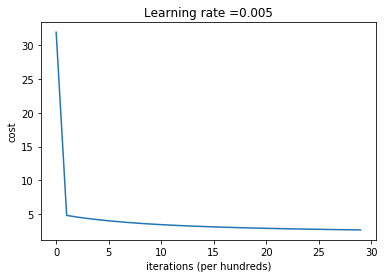

In [25]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [26]:
Y_Val_pred = lr.predict(d["w"], d["b"], val_set_x)

#print(Y_Val_pred)
print("Validation accuracy: {} %".format(100 - np.mean(np.abs(Y_Val_pred - val_set_y)) * 100))

Validation accuracy: 98.34428166351607 %


y = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


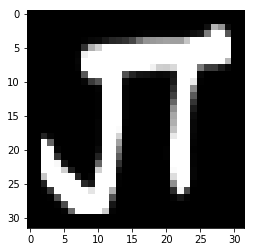

In [33]:
index = 657
plt.imshow(val_set_x_orig[index])
print ("y = " + str(Y_Val_pred[:, index]) )
print ("  = " + str(val_set_y[:, index]) )

In [34]:
hdf5_file.close()